<a href="https://colab.research.google.com/github/kianahs/AI_coursework_2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Lost in the closet (Classification)

You are an artist who secluded yourself for years to come up with the perfect design for a new brand
of clothes. However, your time off from civilisation was not so beneficial since you cannot distinguish
a T-shirt from a dress or a sneaker from a sandal any more. In order to address that issue, you choose
to train a Convolutional Neural Network (using PyTorch) that will help you identify each cloth to
match the perfect design you created. In order to train it, you decide to rely on the dataset fashion
MNIST (https://github.com/zalandoresearch/fashion-mnist).
You can access the data using the following lines (we strongly advise you to copy this code from the
fashion mnist.py file attached to this coursework):


In [6]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

train_set = torchvision.datasets.FashionMNIST(root = ".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
# Fix the seed to be able to get the same randomness across runs
# and hence reproducible outcomes
torch.manual_seed(0)


# If you are using CuDNN , otherwise you can just ignore
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

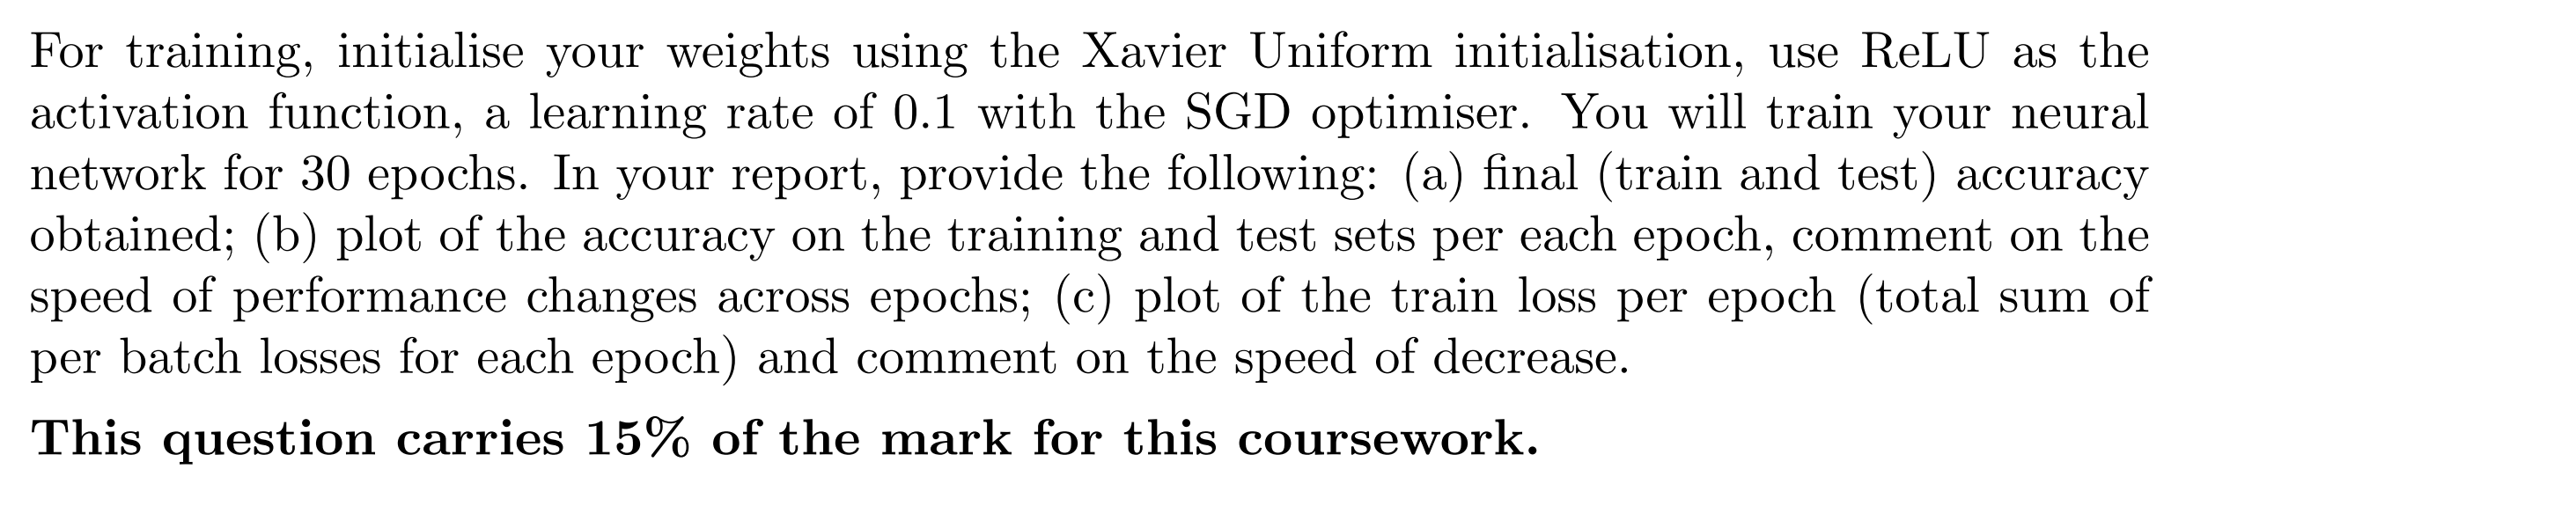

In [7]:
# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    # TO DO

    # Alternatively use the Sequential container to run layers sequentially

    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), nn.ReLU(), nn.MaxPool2d(2, stride=2),
                                   nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.MaxPool2d(2, stride = 2))

    # Alternatively use the Sequential container to run layers sequentially

    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024,256), nn.ReLU(), nn.Linear(256, 10))

  def forward(self, x):
    # TO DO
    # Alternatively use the Sequential container to run layers sequentially

    x = self.cnn_model(x)
    # x = x.view(x.size(0), -1)
    x = x.view(-1, 1024)
    x = self.fc_model(x)

    return x



In [8]:


def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    # TO DO
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total


def weights_init(layer):
    if isinstance(layer, nn.Linear):
      # TO DO
      nn.init.xavier_uniform_(layer.weight)
      # This would be an uniform initialization between -1 and 1
      # nn.init.uniform_(layer.weight, -1, 1)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN().to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)


loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []

for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader, 0):
    # TO DO
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_epoch += loss.item()
    # TO DO
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

cuda:0
Epoch 1: loss: 927.32158344239, train accuracy: 87.38833333333334, test accuracy:86.37
Epoch 2: loss: 580.2699912339449, train accuracy: 90.21, test accuracy:88.6
Epoch 3: loss: 488.85803762916476, train accuracy: 90.98333333333333, test accuracy:88.94
Epoch 4: loss: 432.92150581628084, train accuracy: 92.20833333333333, test accuracy:89.7
Epoch 5: loss: 384.3453770708293, train accuracy: 93.62166666666667, test accuracy:90.39
Epoch 6: loss: 342.71214227285236, train accuracy: 94.41833333333334, test accuracy:91.08
Epoch 7: loss: 308.1650528414175, train accuracy: 94.41, test accuracy:90.5
Epoch 8: loss: 272.2953873788938, train accuracy: 94.58333333333333, test accuracy:90.35
Epoch 9: loss: 242.85922426637262, train accuracy: 96.28166666666667, test accuracy:91.26
Epoch 10: loss: 215.7805350665003, train accuracy: 96.57, test accuracy:90.79
Epoch 11: loss: 189.4255246683024, train accuracy: 96.885, test accuracy:91.18
Epoch 12: loss: 171.95562875666656, train accuracy: 97.24, t

Label is: 6
Dimension of input data: torch.Size([32, 1, 28, 28])
Dimension of labels: torch.Size([32])


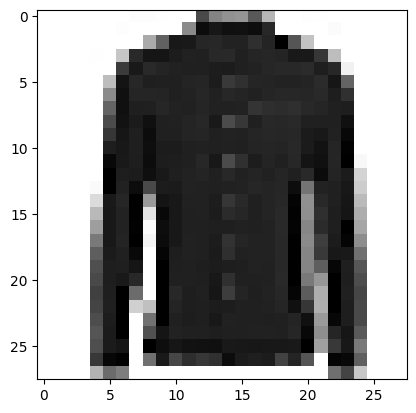

In [9]:
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

In [10]:
print(label)

tensor([6, 7, 0, 3, 9, 2, 2, 6, 1, 6, 5, 5, 0, 3, 0, 5, 1, 1, 1, 2, 5, 2, 3, 8,
        6, 4, 0, 9, 9, 1, 0, 1])


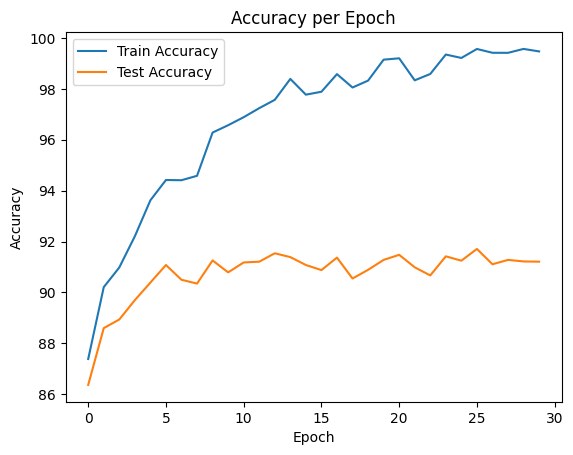

In [11]:

plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
input_data[0,:,:,:].numpy().shape

(1, 28, 28)

In [20]:
label

tensor([6, 7, 0, 3, 9, 2, 2, 6, 1, 6, 5, 5, 0, 3, 0, 5, 1, 1, 1, 2, 5, 2, 3, 8,
        6, 4, 0, 9, 9, 1, 0, 1])

In [14]:
input_data[0,:,:,:].numpy()

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.01176471, 0.01176471, 0.00392157,
         0.        , 0.        , 0.7137255 , 0.48235294, 0.43137255,
         0.41568628, 0.654902  , 0.28627452, 0.        , 0.        ,
         0.00784314, 0.00392157, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.00784314, 0.        , 0.        , 0.        ,
         0.        , 0.45882353, 0.9529412 , 0.9098039 , 0.9372549 ,
         0.92941177, 0.9490196 , 0.84313726, 0.        , 0.        ,
         0.        , 0.        , 0.01568628, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333334, 0.61960787,
         0.9019608 , 0.8980392 , 0.8509804 , 0.84705883, 0.8627451 ,
         0.